In [1]:
# import libraries
import numpy as np
import xarray as xr
import cloudfraction
import matplotlib.pyplot as plt

In [2]:
# extract data from 3D model output that can be found on DKRZ
# ds = xr.open_dataset('/path/to/3D/output/SAM_CRM_RCE_large295_3D_0000720000.nc',decode_times=False)
ds = xr.open_dataset('/huracan/tank2/columbia/RCEMIP/SAM6.11.2/RCEMIP_upload/RCE_large295/3D/SAM_CRM_RCE_large295_3D_0000720000.nc',decode_times=False)
cw = np.squeeze(ds['clw'].values) # g/g
ci = np.squeeze(ds['cli'].values) # g/g
ta = np.squeeze(ds['ta'].values)  # K
pa = np.squeeze(ds['pa'].values)  # Pa
z = np.squeeze(ds['z'].values)    # m
ds.close()

# calculate cfv1 and cfv2
cldv1,cldv2=cloudfraction.cloudfraction(cw,ci,ta,pa)
del cw,ci,ta,pa

# domain average for 1D profiles
cldv1   = np.squeeze(np.nanmean(cldv1,axis=(1,2))) # unitless
cldv2   = np.squeeze(np.nanmean(cldv2,axis=(1,2))) # unitless

# post-processed 1D profiles from 1D output
# ds = xr.open_dataset('/path/to/postprocess/1D/profiles/SAM-CRM_large295_1D-profiles.nc',decode_times=False)
ds = xr.open_dataset('/home/cstauffer/DATA/PROFILES/ENV/cf1D/large295/SAM-CRM_large295_1D-profiles.nc',decode_times=False)
# cfv0 profile and height
cldv0 = np.squeeze(ds['cfv0_avg'].values)
zgv0 = np.squeeze(ds['zg_avg'].values)
# SAM-CRM colors
cr = np.squeeze(ds['Cr'].values)
cg = np.squeeze(ds['Cg'].values)
cb = np.squeeze(ds['Cb'].values)
ca = np.squeeze(ds['Ca'].values)
ds.close()

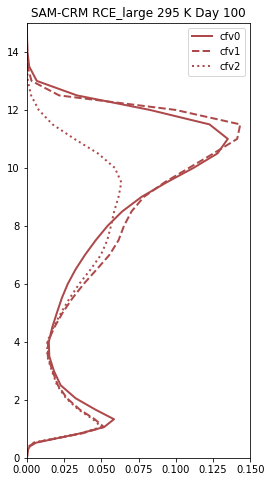

In [3]:
# plot sample profile 
plt.figure(figsize=(4,8))
plt.plot(cldv0,zgv0,color=[cr,cg,cb,ca],linewidth=2,linestyle='-',label='cfv0')
plt.plot(cldv1,z/1000,color=[cr,cg,cb,ca],linewidth=2,linestyle='--',label='cfv1')
plt.plot(cldv2,z/1000,color=[cr,cg,cb,ca],linewidth=2,linestyle=':',label='cfv2')
plt.ylim(0,15)
plt.xlim(0,0.15)
plt.title('SAM-CRM RCE_large 295 K Day 100')
plt.legend()
plt.show()